# Práctica 2: Clasificador Bayesiano
## Gabriel Daniel Aguilar Luna
## Zuriel Uzai Rodrígez Agiss
### _Facultad de Ingenierría, Universidad Nacional Autónoma de México_
### _Ciudad de México, México_
#### gabriel.aguilar@ingenieria.unam.edu
#### zurieluzai2015@gmail.com

***

### __1. Objetivos__

Clasificar imágenes con 2, 3 o 4 regiones utilizando el clasificador de Bayes.

***

### __2. Introducción__

### Clasificador de Bayes

**aquí se investiga xd

***

### __3. Desarrollo__

#### __3.1 Realizar preprocesamiento de sus imágenes con un filtro gaussiano__

In [1]:
import matplotlib.pyplot as plt
import cv2
import skimage as ski
import PIL as pil
import imageio as io
import numpy as np
from PIL import Image, ImageFilter

In [2]:
fruta = io.imread('comida/Entrenamiento1.jpg')
fruta.shape, fruta.dtype

((600, 600, 3), dtype('uint8'))

(-0.5, 599.5, 599.5, -0.5)

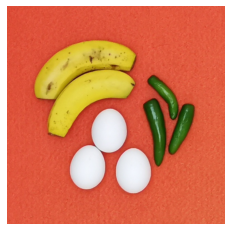

In [3]:
#iamgen original
plt.imshow(fruta)
plt.axis('off')

#### Experimentos con contour con el canal verde:

(0.0, 599.0, 0.0, 599.0)

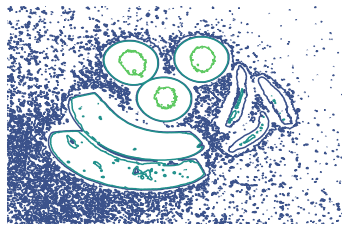

In [4]:
#La funcion contour recibe un arreglo 2D (un solo canal de color (gris))
#En las siguientes celdas envio solo el canal verde de fruta con fruta[:,:,1]
#Experimentando con el numero de niveles indicados a contour:
plt.contour(fruta[:,:,1],3)
plt.axis('off')

(0.0, 599.0, 0.0, 599.0)

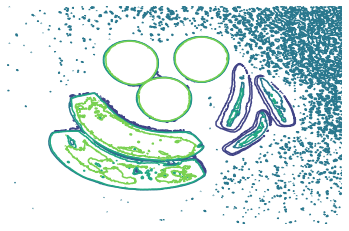

In [5]:
plt.contour(fruta[:,:,1],4)
plt.axis('off')

(0.0, 599.0, 0.0, 599.0)

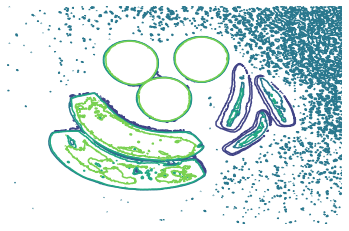

In [6]:
plt.contour(fruta[:,:,1],5)
plt.axis('off')

(0.0, 599.0, 0.0, 599.0)

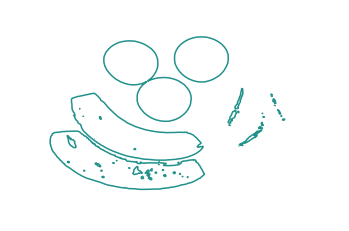

In [7]:
plt.contour(fruta[:,:,1],1)
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

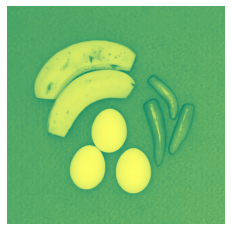

In [8]:
#Se muestra el canal que se ha estado enviando a contour:
plt.imshow(fruta[:,:,1], cmap='summer')
plt.axis('off')

#### Experimentos con contour con la imagen convertida a gris:

(-0.5, 599.5, 599.5, -0.5)

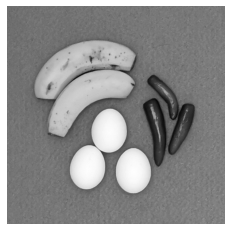

In [9]:
#Utilizando la funcion para convertir de RGB a Gris de cv2,
#Esto con la intencion de evitar la perdida de información al utilizar un unico canal de color:
fruta_gris = cv2.imread("comida/Entrenamiento1.jpg")
fruta_gris = cv2.cvtColor(fruta_gris, cv2.COLOR_BGR2GRAY) #Convertir a escala de grises
plt.imshow(fruta_gris, cmap=plt.cm.gray)
plt.axis('off')

(0.0, 599.0, 0.0, 599.0)

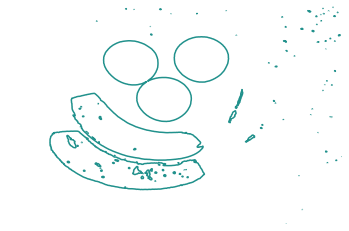

In [10]:
#Probando contour con la imagen gris generada anteriormente:
fruta_contornos = plt.contour(fruta_gris,1)
plt.axis('off')

#### Mostrando una unica linea del resultado de contour:

(62.64461538461538, 366.6169230769231, 86.26289910600255, 263.3067049808429)

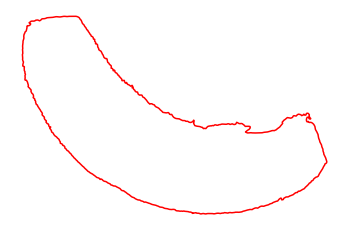

In [11]:
#Probando dibujar una unica linea de las dibujadas por contour:
line = fruta_contornos.collections[1].get_paths()[3].vertices
line = np.copy(line)
plt.plot(line[:,0], line[:,1], 'r-')
plt.axis('off')

#### Mostrando la linea junto con la imagen:

(-0.5, 599.5, 599.5, -0.5)

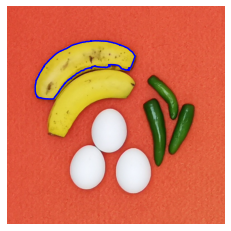

In [12]:
#Ploteo de la linea junto con la imagen:
plt.imshow(fruta)
line = fruta_contornos.collections[1].get_paths()[3].vertices
line = np.copy(line)
plt.plot(line[:,0], line[:,1], 'b')
plt.axis('off')

#### Buscando el otro platano:

(-0.5, 599.5, 599.5, -0.5)

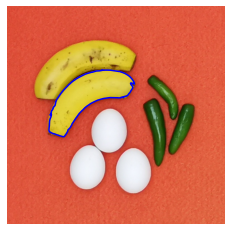

In [13]:
#Aqui probe con multiples indices para ...get_paths()[x]... hasta encontrar el otro platano
plt.imshow(fruta)
line = fruta_contornos.collections[1].get_paths()[37].vertices
line = np.copy(line)
plt.plot(line[:,0], line[:,1], 'b')
plt.axis('off')

#### Entendiendo particularidades de las lineas de los platanos:

In [14]:
#Aquí busco en que caracteristicas coinciden los indices 3 y 37
line = fruta_contornos.collections[1].get_paths()[37].vertices
line2 = fruta_contornos.collections[1].get_paths()[3].vertices
line3 = fruta_contornos.collections[1].get_paths()[5].vertices
line.shape, line2.shape, line3.shape

((868, 2), (924, 2), (7, 2))

In [15]:
#Notendo que el tamaño de la primera longitud del arrlego es bastante más grande
len(line)

868

#### Mostrando todas las lineas mayores a 100:

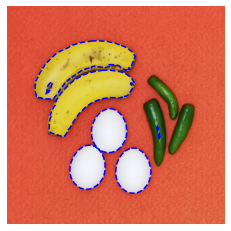

In [16]:
#Con este for muestro todas las lineas cuya primera dimension sea mayor a 100
for i in fruta_contornos.collections[1].get_paths():
    if len(i.vertices) > 100:
        plt.plot(i.vertices[:,0], i.vertices[:,1], '--b')
plt.imshow(fruta)
plt.axis('off')
plt.savefig('resultados/comida_contornos.png')

#### Filtro GAUSSIANO:

In [17]:
#codigo de internet para aplicar filtro Gaussiano xd
#Abriendo imagen con Image
image = Image.open(r'comida\Entrenamiento1.jpg')
  
#Aplicando el filtro de Gaussiano
#Con un valor para el radio igual a 3
image = image.filter(ImageFilter.GaussianBlur(radius = 3))
  
#Se muestra la imagen
image.show()

#Se gurada esta nueva imagen borrosa
image.save("resultados/Entrenamiento1_gaussianBlur.jpg")

#### La imagen borrosa convertida a gris:

(-0.5, 599.5, 599.5, -0.5)

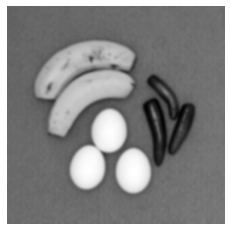

In [18]:
#Esta nueva imagen se abre con cv2 para volverla gris
fruta_gaussiana = cv2.imread("resultados/Entrenamiento1_gaussianBlur.jpg")
fruta_gaussiana = cv2.cvtColor(fruta_gaussiana, cv2.COLOR_BGR2GRAY) #Convertir a escala de grises
plt.imshow(fruta_gaussiana, cmap=plt.cm.gray)
plt.axis('off')

#### Probando contour con la imagen Gaussiana Gris:

(0.0, 599.0, 0.0, 599.0)

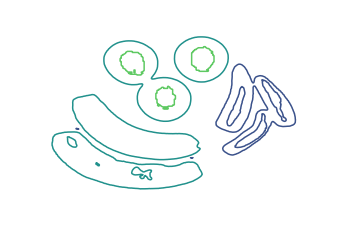

In [19]:
#Probando contour con esta nueva imagen gaussiana gris
fruta_gaussiana_contornos = plt.contour(fruta_gaussiana,2)
plt.axis('off')

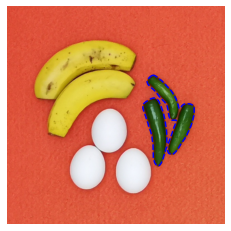

In [20]:
#A partir de aqui busco los intervalos con los que puedo separar a las diferentes clases
for i in fruta_gaussiana_contornos.collections[1].get_paths():
    if len(i.vertices) > 300:
        plt.plot(i.vertices[:,0], i.vertices[:,1], '--b')
plt.imshow(fruta)
plt.axis('off')
plt.savefig('resultados/comida_gaussiana3_contornos1.png')

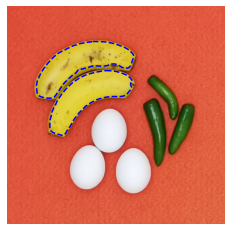

In [21]:
for i in fruta_gaussiana_contornos.collections[2].get_paths():
    if len(i.vertices) > 765 or (len(i.vertices) < 760 and len(i.vertices) > 600):
        plt.plot(i.vertices[:,0], i.vertices[:,1], '--b')
plt.imshow(fruta)
plt.axis('off')
plt.savefig('resultados/comida_gaussiana3_contornos2.png')

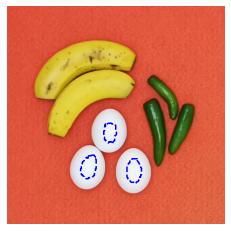

In [22]:
for i in fruta_gaussiana_contornos.collections[3].get_paths():
    if len(i.vertices) > 100:
        plt.plot(i.vertices[:,0], i.vertices[:,1], '--b')
plt.imshow(fruta)
plt.axis('off')
plt.savefig('resultados/comida_gaussiana3_contornos3.png')

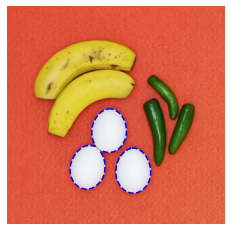

In [23]:
curvas_array = []
for i in fruta_gaussiana_contornos.collections[2].get_paths():
    if (len(i.vertices) < 600 and len(i.vertices) > 300) or (len(i.vertices) < 765 and len(i.vertices) > 760):
        plt.plot(i.vertices[:,0], i.vertices[:,1], '--b')
        curvas_array.append(i.vertices)
plt.imshow(fruta)
plt.axis('off')
plt.savefig('resultados/comida_gaussiana3_contornos2.png')

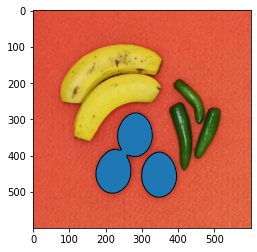

In [24]:
from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch
poly_array = []
for crvua in curvas_array:
    x = crvua[:,0]
    y = crvua[:,1]
    poly_array.append(Polygon([(i[0], i[1]) for i in zip(x,y)]))
polygons = MultiPolygon(poly_array)
#len(polygons.geoms)
#type(poly)
#polygons
#print (polygons[0])
fig = plt.figure() 
ax = fig.gca()
lx,ly,lc = fruta.shape
mask = np.zeros(fruta_gaussiana.shape, dtype=np.uint8)


plt.imshow(fruta)

for poly in polygons:
    patch_poly = PolygonPatch(poly)
    ax.add_patch(patch_poly)
    
#fruta[mask] = 0
#plt.imshow(fruta)
#ax.axis('scaled')
plt.show()

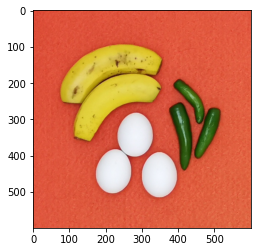

In [25]:
plt.imshow(fruta)
for poly in polygons:
    patch_poly = PolygonPatch(poly)
    #ax.add_patch(patch_poly)
    for mskx in range(lx):
        for msky in range (ly):
            if (patch_poly.contains_point((mskx,msky))):
                fruta[msky][mskx][0] = 0
                fruta[msky][mskx][1] = 0
                fruta[msky][mskx][2] = 0
#fruta[mask] = 0
#plt.imshow(fruta)
#ax.axis('scaled')
plt.show()

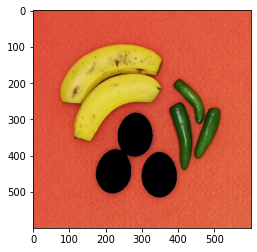

In [26]:
#fruta[mask] = 0
plt.imshow(fruta)
#ax.axis('scaled')
plt.show()

### Referencias:

https://stackoverflow.com/questions/29213238/python-convert-contours-to-image#29214175

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/stable/api/contour_api.html#matplotlib.contour.QuadContourSet

https://www.geeksforgeeks.org/apply-a-gauss-filter-to-an-image-with-python/